<a href="https://colab.research.google.com/github/dnsdudrla97/Naive_Bayes_classifier/blob/master/NaiveBayesClassification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                       -                                       |                                       -                                       |                                       -                                       |
|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
|  [Exercise 1 (blob classification)](<#Exercise-1-(blob-classification&#41;>)  | [Exercise 2 (plant classification)](<#Exercise-2-(plant-classification&#41;>) |  [Exercise 3 (word classification)](<#Exercise-3-(word-classification&#41;>)  |
|       [Exercise 4 (spam detection)](<#Exercise-4-(spam-detection&#41;>)       |                                                                               |                                                                               |



## ML: Naive Bayes classification

분류는지도 학습의 한 형태입니다. 목표는 모든 데이터 포인트에 레이블을 달아주는 것입니다. 같은 라벨을 가진 포인트는 같은 클래스에 속합니다. 레이블이 두 개 이상있을 수 있습니다. 예를 들어, 생명체는 동물, 식물, 곰팡이, 고세균, 박테리아, 원생 동물 및 염색체 레이블로 (거칠게) 분류 될 수 있습니다. 데이터 포인트에는 레이블을 예측하는 데 사용할 수있는 특정 기능이 있습니다. 예를 들어 깃털이면 동물 일 가능성이 높습니다.

지도 학습에서 알고리즘에는 먼저 기능과 레이블이있는 학습 데이터 세트가 제공됩니다. 그런 다음 알고리즘은 이러한 기능을 학습하고 (확률 적) 모델에 레이블을 지정합니다.이 모델은 나중에 볼 수없는 데이터의 레이블을 예측하는 데 사용할 수 있습니다.

Naive Bayes 분류는 빠르고 이해하기 쉬운 분류 방법입니다. 속도는 기본 확률 분포, 즉 기능의 독립성에 대한 가정에 대한 일부 단순화로 인해 발생합니다. 그러나 특히 데이터에 충분한 기능이있는 경우 매우 강력 할 수 있습니다.

각 레이블 L에 확률 분포가 있다고 가정합니다. 이 분포는 각 가능한 피처 조합 (피처 벡터)에 대한 확률을 제공합니다.

$$P(features | L).$$

베이지안 분류의 주요 아이디어는 의존 방향을 반대로하는 것입니다. 우리는 특징에 따라 레이블을 예측하려고합니다.

$$P(L | features)$$


$$P(L | features) = \frac{P(features | L)P(L)}{P(features)}.$$

L1 및 L2 및 관련 분포에 $ P (featrues | L1) $ 및 $ P (featrues | L2) $ 레이블을 지정해야한다고 가정 해 봅시다. 레이블이 모르는 "featrues"이 포함 된 데이터 요소가있는 경우 사후 확률의 비율을 사용하여 예측할 수 있습니다.
$$\frac{P(L1 | features)}{P(L2 | features)} = \frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}.$$

비율이 1보다 크면 데이터 요소에 레이블 L1을 레이블하고 레이블이 없으면 레이블 L2를 지정합니다.
레이블의 사전 확률 P (L1) 및 P (L2)는 레이블이있는 각 데이터 포인트에 대해 입력 데이터에서 쉽게 찾을 수 있습니다. 레이블에 지정된 기능의 확률도 마찬가지입니다.

먼저 가우시안 분포를 사용하여 순진 베이 즈 분류를 시연합니다.

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

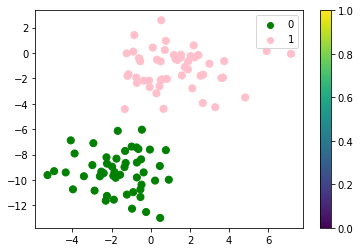

In [27]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["green", "pink"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();
plt.colorbar();

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

Naive Bayes 알고리즘은 데이터에 2 개의 2 차원 가우스 분포를 적용했습니다. 평균과 분산은 이러한 분포를 완전히 정의합니다.

In [13]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

AttributeError: ignored

이 분포를 그려 봅시다. 먼저 origo에서 각 방향으로 표준 편차를 제공하는 타원을 그리는 도우미 함수를 정의합니다.


In [0]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

그런 다음 실제 플로팅을 수행합니다.


In [12]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

NameError: ignored

* 정확도 점수 *는 라벨을 얼마나 잘 예측했는지 측정합니다. 최대 값은 1.0입니다.

In [9]:
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

NameError: ignored

우리가 이미 본 데이터를 예측하려고 했기 때문에, 그 점수는 가능한 한 최고였는데, 그것은 놀라운 일이 아니다! 나중에 우리는 데이터를 두 부분으로 나눌 것이다: 하나는 모델을 배우는 것이고 다른 하나는 예측 기술을 시험하는 것이다.

### Another example

Let's generate some more data using multivariate normal distributions.

In [0]:
cov=np.array([[ 4.68, -4.32],
 [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

The two clusters seem to be quite separate. Let's try naive Bayesian classification on this data.

In [0]:
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [0]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

In [0]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)

Even thought the score is quite good, we can see from the plot that the algorithm didn't have good models for the data. We can plot the models the algorithm used:

In [0]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);

The problem with naive Bayesian classification is that it tries to model the data using Gaussian distributions, which are aligned along the x and y axes. With this example data we would have needed Gaussian distributions which are "tilted".

### Text classification

우리는 다음 공개 포럼에 게시된 메시지 세트를 분류하려고 노력한다. 메시지는 주제별로 그룹으로 나뉘었다. 그래서 분류 테스트를 위한 데이터 세트를 준비했다. 먼저 이 데이터를 스키킷 학습을 사용하여 로드하고 메시지 범주를 인쇄합니다.


In [18]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We concentrate on four message categories only. The tool `fetch_20newsgroups` allows us to easily split the data into training and testing data.

In [0]:
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.crypt']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Let's see what we got:

In [20]:
print("Training data:", "Data:", str(type(train.data)), len(train.data), "Target:", str(type(train.target)), len(train.target))
print("Test data:", "Data:", str(type(test.data)), len(test.data), "Target", str(type(test.data)), len(test.target))

Training data: Data: <class 'list'> 2364 Target: <class 'numpy.ndarray'> 2364
Test data: Data: <class 'list'> 1574 Target <class 'list'> 1574


데이터 세트에서 각 단어의 빈도를 기능으로 사용합니다. 즉, 데이터 세트에 별개의 단어가있는 것보다 많은 기능이 있습니다. 기능 수는 $ f $로 나타냅니다. 기능이 이제 계산되었으므로 가우스 대신 다항 분포를 사용하는 것이 합리적입니다.

다항 분포를 사용하여 이러한 메시지를 모델링 해 봅시다. 각 메시지 범주에는 고유 한 배포가 있습니다. 다항 분포에는 음수가 아닌 $ f $ 매개 변수 $ \ theta_1, \ ldots, \ theta_f $가 있습니다. 예를 들어, 매개 변수 $ \ theta_3 $는이 배포판이 설명하는 범주의 메시지에 "board"라는 단어가 나타날 확률을 알려줍니다.

scikit-learn에는 텍스트 문자열 형태의 메시지를 특징 벡터로 변환하는 클래스 'CountVectorizer'가 있습니다. 이 변환을 사용중인 모델 (다항식 순진 베이)과 통합하여 '적합'방법의 일부로 변환이 자동으로 수행되도록 할 수 있습니다. `make_pipeline` 툴을 사용하여이 통합을 달성합니다.

In [21]:
#from sklearn.feature_extraction.text import TfidfVectorizer  # an alternative feature extractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels_fitted = model.predict(test.data)
print("Accuracy score is", accuracy_score(labels_fitted, test.target))

Accuracy score is 0.920584498094028


The classifier seem to work quite well! Notice that now we used separate data for testing the model.

Let's have a closer look at the resulting feature vectors.

In [22]:
vec=CountVectorizer()
features=vec.fit_transform(train.data)
print("Type of feature matrix:", type(features))
print(features[0,:])        # print the features of the first sample point

Type of feature matrix: <class 'scipy.sparse.csr.csr_matrix'>
  (0, 15373)	1
  (0, 18962)	3
  (0, 21852)	5
  (0, 9553)	4
  (0, 34790)	6
  (0, 13317)	6
  (0, 19099)	1
  (0, 16034)	1
  (0, 30377)	1
  (0, 26624)	1
  (0, 23858)	1
  (0, 20509)	1
  (0, 15109)	2
  (0, 11079)	1
  (0, 23854)	2
  (0, 32729)	1
  (0, 20381)	1
  (0, 2100)	1
  (0, 12580)	1
  (0, 18085)	1
  (0, 27158)	1
  (0, 31686)	6
  (0, 23118)	1
  (0, 25400)	1
  (0, 17310)	1
  :	:
  (0, 11100)	1
  (0, 27521)	1
  (0, 29104)	1
  (0, 5980)	1
  (0, 30641)	1
  (0, 27517)	1
  (0, 12577)	1
  (0, 25336)	1
  (0, 24025)	1
  (0, 18436)	1
  (0, 29505)	1
  (0, 29494)	1
  (0, 11068)	1
  (0, 21787)	1
  (0, 23460)	1
  (0, 34425)	1
  (0, 16809)	1
  (0, 17883)	1
  (0, 31398)	1
  (0, 34222)	1
  (0, 25926)	1
  (0, 6320)	1
  (0, 29697)	1
  (0, 19220)	1
  (0, 20579)	1


The feature matrix is stored in sparse format, that is, only the nonzero counts are stored. How many words were in the first message?

In [23]:
print("Number of words:", features[0,:].sum())
col = vec.vocabulary_["it"]   # Get the column of 'it' word in the feature matrix
print(f"Word 'it' appears in the first message {features[0, col]} times.")
print()
print(train.data[0])   # Let's print the corresponding message as well
#print(vec.get_feature_names())

Number of words: 177
Word 'it' appears in the first message 2 times.

From: jgfoot@minerva.cis.yale.edu (Josh A. Goldfoot)
Subject: Re: Organized Lobbying for Cryptography
Organization: Yale University
Lines: 21
Distribution: inet
Reply-To: jgfoot@minerva.cis.yale.edu
NNTP-Posting-Host: minerva.cis.yale.edu
X-Newsreader: TIN [version 1.1 Minerva PL9]

Shaun P. Hughes (sphughes@sfsuvax1.sfsu.edu) wrote:
: In article <1r3jgbINN35i@eli.CS.YALE.EDU> jgfoot@minerva.cis.yale.edu writes:
[deletion]
: >Perhaps these encryption-only types would defend the digitized porn if it
: >was posted encrypted?
: >
: >These issues are not as seperable as you maintain.
: >

: Now why would anyone "post" anything encrypted? Encryption is only of 
: use between persons who know how to decrypt the data.

: And why should I care what other people look at? 

I was responding to another person (Tarl Neustaedter) who held that the
EFF wasn't the best organization to fight for crytography rights since the
EFF also

#### <div class="alert alert-info">Exercise 1 (blob classification)</div>

Write function `blob_classification` that gets feature matrix X and label vector y as parameters. It should then return the accuracy score of the prediction. Do the prediction using `GaussianNB`, and use `train_test_split` function from `sklearn` to split the dataset in to two parts: one for training and one for testing. Give parameter `random_state=0` to the splitting function so that the result is deterministic. Use training set size of 75% of the whole data.
<hr/>

#### <div class="alert alert-info">Exercise 2 (plant classification)</div>

Write function `plant_classification` that does the following:

* loads the iris dataset using sklearn (`sklearn.datasets.load_iris`)
* splits the data into training and testing part using the `train_test_split` function so that the training set size is 80% of the whole data (give the call also the `random_state=0` argument to make the result deterministic)
* use Gaussian naive Bayes to fit the training data
* predict labels of the test data
* the function should return the accuracy score of the prediction performance (`sklearn.metrics.accuracy_score`)
<hr/>

#### <div class="alert alert-info">Exercise 3 (word classification)</div>

This exercise can give four points at maximum!

In this exercise we create a model that tries to label previously unseen words to be either Finnish or English.

Part 1.

Write function `get_features` that gets a one dimensional np.array, containing words, as parameter. It should return a feature matrix of shape (n, 29), where n is the number of elements of the input array. There should be one feature for each of the letters in the following alphabet: "abcdefghijklmnopqrstuvwxyzäö-". The values should be the number of times the corresponding character appears in the word.

Part 2.

Write function `contains_valid_chars` that takes a string as a parameter and returns the truth value of whether all the characters in the string belong to the alphabet or not.

Part 3.

Write function `get_features_and_labels` that returns the tuple (X, y) of the feature matrix and the target vector. Use the labels 0 and 1 for Finnish and English, respectively. Use the supplied functions load_finnish() and load_english() to get the lists of words. Filter the lists in the following ways:

* Convert the Finnish words to lowercase, and then filter out those words that contain characters that don't belong to the alphabet.
* For the English words first filter out those words that begin with an uppercase letter to get rid of proper nouns. Then proceed as with the Finnish words.

Use get_features function you made earlier to form the feature matrix.

Part 4.

We have earlier seen examples where we split the data into learning part and testing part. This way we can test whether the model can really be used to predict unseen data. However, it can be that we had bad luck and the split produced very biased learning and test datas. To counter this, we can perform the split several times and take as the final result the average from the different splits. This is called [cross validation](<https://en.wikipedia.org/wiki/Cross-validation_(statistics)>).

Create `word_classification` function that does the following:

Use the function `get_features_and_labels` you made earlier to get the feature matrix and the labels. Use multinomial naive Bayes to do the classification. Get the accuracy scores using the `sklearn.model_selection.cross_val_score` function; use 5-fold cross validation. The function should return a list of five accuracy scores.

The cv parameter of `cross_val_score` can be either an integer, which specifies the number of folds, or it can be a *cross-validation generator* that generates the (train set,test set) pairs. What happens if you pass the following cross-validation generator to `cross_val_score` as a parameter: `sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)`.

Why the difference?
<hr/>

#### <div class="alert alert-info">Exercise 4 (spam detection)</div>

This exercise gives two points if solved correctly!

In the `src` folder there are two files: `ham.txt.gz` and `spam.txt.gz`. The files are preprocessed versions of the files from https://spamassassin.apache.org/old/publiccorpus/. There is one email per line. The file `ham.txt.gz` contains emails that are non-spam, and, conversely, emails in file `spam.txt` are spam. The email headers have been removed, except for the subject line, and non-ascii characters have been deleted.

Write function `spam_detection` that does the following:

* Read the lines from these files into arrays. Use function `open` from `gzip` module, since the files are compressed. From each file take only `fraction` of lines from the start of the file, where `fraction` is a parameter to `spam_detection`, and should be in the range `[0.0, 1.0]`.
* forms the combined feature matrix using `CountVectorizer` class' `fit_transform` method. The feature matrix should first have the rows for the `ham` dataset and then the rows for the `spam` dataset. One row in the feature matrix corresponds to one email.
* use labels 0 for ham and 1 for spam
* divide that feature matrix and the target label into training and test sets, using `train_test_split`. Use 75% of the data for training. Pass the random_state parameter from `spam_detection` to `train_test_split`.
* train a `MultinomialNB` model, and use it to predict the labels for the test set

The function should return a triple consisting of

* accuracy score of the prediction
* size of test sample
* number of misclassified sample points

Note. The tests use the `fraction` parameter with value 0.1 to ease to load on the TMC server. If full data were used and the solution did something non-optimal, it could use huge amounts of memory, causing the solution to fail.
<hr/>

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
